In [1]:
from regression_lasso.reg_sbm import *
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


penalty_func: norm1
MSE: {0.0: 1.1581110641514417e-06, 0.001: 7.685158802842036e-07, 0.01: 2.5160771960986094e-05, 0.1: 0.14512263063493758, 0.2: 0.23225642496186483, 0.3: 1.409065727073534, 0.4: 3.019626039039617, 0.5: 3.151781105422529, 0.6: 3.1885410445156515}


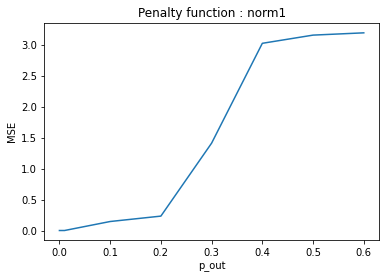

penalty_func: norm2
MSE: {0.0: 6.037777043439715, 0.001: 5.865957283115935, 0.01: 6.812787450683373, 0.1: 6.59831150466496, 0.2: 6.0810572105841265, 0.3: 6.746159336858964, 0.4: 6.880725779161215, 0.5: 6.200274522748055, 0.6: 5.999545210182665}


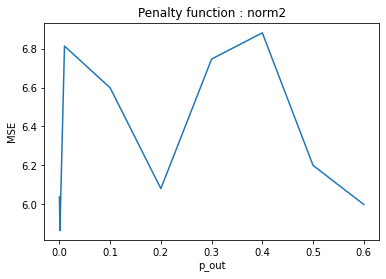

penalty_func: mocha
MSE: {0.0: 0.22281286205625345, 0.001: 0.2536800857281821, 0.01: 0.31543669874483377, 0.1: 0.9065096202443745, 0.2: 1.3586658300556798, 0.3: 1.7399588214722168, 0.4: 2.454437039437468, 0.5: 2.482204773841632, 0.6: 2.6675441562612865}


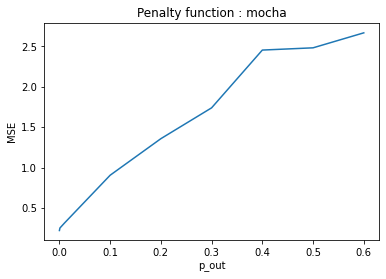

In [16]:
PENALTY_FUNCS = ['norm1', 'norm2', 'mocha']

N1, N2 = 100, 100
lambda_lasso=0.001
K=500
pouts = [0.0, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

for penalty_func in PENALTY_FUNCS:
    MSEs = {}
    
    for pout in pouts:
        B, weight_vec, Y, X, samplingset = get_sbm_2blocks_data(N1, N2, m=5, n=2, M=0.2, pin=0.5, pout=pout)
        
        data = prepare_data_for_algorithm1(B, X, Y, samplingset, 'linear_reg')
        
#         iteration_scores, new_w = algorithm_1(K, B, weight_vec, data, Y, samplingset, lambda_lasso, penalty_func, score_func=mean_squared_error)
        iteration_scores, new_w = algorithm_1(K, B, weight_vec, data, Y, samplingset, lambda_lasso, penalty_func)

        alg1_score, _, _ = get_scores(X, Y, new_w, samplingset)
        MSEs[pout] = alg1_score['total']['mean_squared_error']
        
    print('penalty_func:', penalty_func)
    print('MSE:', MSEs)
    
    plt.close()
    plt.plot(list(MSEs.keys()), list(MSEs.values()))
    plt.xlabel('p_out')
    plt.ylabel('MSE')
    plt.title('Penalty function : %s' % penalty_func)
    plt.show()

    

penalty_func: norm1
MSE: {0.0: 7.437362059104402e-07, 0.001: 2.8753310820687576e-07, 0.01: 5.621074326131114e-05, 0.1: 0.0012263531325498, 0.2: 1.8238797758248197, 0.3: 2.236118064619955, 0.4: 2.6478045031729285, 0.5: 2.8534717476604903, 0.6: 2.6592238543447038, 1.0: 0.09408512996031983, 0.0001: 4.149394116465706}


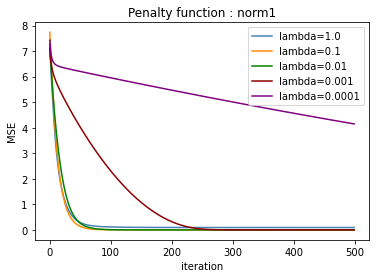

penalty_func: norm2
MSE: {0.0: 7.437362059104402e-07, 0.001: 6.703334980517624, 0.01: 6.757699242271505, 0.1: 5.304283078954438, 0.2: 1.8238797758248197, 0.3: 2.236118064619955, 0.4: 2.6478045031729285, 0.5: 2.8534717476604903, 0.6: 2.6592238543447038, 1.0: 0.003463785540628618, 0.0001: 6.84681839683293}


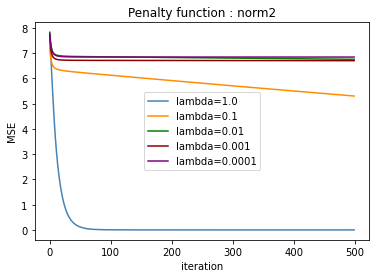

penalty_func: mocha
MSE: {0.0: 7.437362059104402e-07, 0.001: 0.2411244211039545, 0.01: 0.00045832468415610256, 0.1: 0.007573973203350114, 0.2: 1.8238797758248197, 0.3: 2.236118064619955, 0.4: 2.6478045031729285, 0.5: 2.8534717476604903, 0.6: 2.6592238543447038, 1.0: 0.17030104222303635, 0.0001: 4.359208935030202}


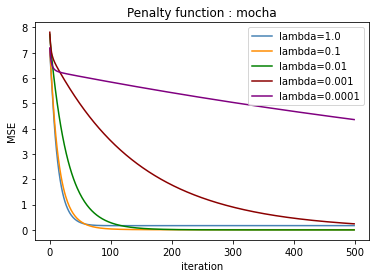

In [15]:
POUT = 0.001
lambda_lassos = [1.0, 0.1, 0.01, 0.001, 0.0001]
colors = ['steelblue', 'darkorange', 'green', 'darkred', 'purple']
x1 = [i for i in range(K)]
for penalty_func in PENALTY_FUNCS:
    
    plt.close()
    
    for i, lambda_lasso in enumerate(lambda_lassos):
        B, weight_vec, Y, X, samplingset = get_sbm_2blocks_data(N1, N2, m=5, n=2, M=0.2, pin=0.5, pout=POUT)
        
        data = prepare_data_for_algorithm1(B, X, Y, samplingset, 'linear_reg')
        
        iteration_scores, new_w = algorithm_1(K, B, weight_vec, data, Y, samplingset, lambda_lasso, penalty_func, score_func=mean_squared_error)
        
        alg1_score, _, _ = get_scores(X, Y, new_w, samplingset)
        MSEs[lambda_lasso] = alg1_score['total']['mean_squared_error']
        
        plt.plot(x1, iteration_scores, label='lambda='+str(lambda_lasso), c=colors[i])
    
    print('penalty_func:', penalty_func)
    print('MSE:', MSEs)
    
    plt.xlabel('iteration')
    plt.ylabel('MSE')
    plt.title('Penalty function : %s' % penalty_func)
    plt.legend(loc='best')
    plt.show()
